In [25]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
from datetime import datetime
import statistics
%matplotlib inline
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('douban_imdb.csv')

In [27]:
df

,genres,name,rating,ratingCount,index,电影名,评分,评价人数,链接,时间,演员,imdb_link
0,Action Adventure Thriller,Die Another Day (2002),6.1,"177,560",0,007之择日而亡,7.1,26876.0,https://movie.douban.com/subject/1303773/,2002-11-22 00:00:00,"['皮尔斯·布鲁斯南', '哈莉·贝瑞', '托比·斯蒂芬斯', '裴淳华', '尹成植']",http://www.imdb.com/title/tt0246460
1,Action Adventure Thriller,Tomorrow Never Dies (1997),6.5,"156,249",1,007之明日帝国,7.2,24367.0,https://movie.douban.com/subject/1299247/,1997-12-09(伦敦首映),"['1997-12-12(英国)', '1997-12-19(美国)', '皮尔斯·布鲁斯南...",http://www.imdb.com/title/tt0120347
2,Action Adventure Thriller,GoldenEye (1995),7.2,"207,650",2,007之黄金眼,7.5,25002.0,https://movie.douban.com/subject/1292677/,1995-11-17 00:00:00,"['皮尔斯·布鲁斯南', '肖恩·宾', '伊沙贝拉·斯科鲁普科', '法米克·詹森', '...",http://www.imdb.com/title/tt0113189
3,Action Adventure Thriller,The World Is Not Enough (1999),6.4,"163,937",3,007之黑日危机,7.3,24736.0,https://movie.douban.com/subject/1293174/,1999-11-19(美国),"['1999-11-26(英国)', '皮尔斯·布鲁斯南', '苏菲·玛索', '罗伯特·卡...",http://www.imdb.com/title/tt0143145
4,Action Adventure Thriller,Casino Royale (2006),8.0,"498,804",4,007：大战皇家赌场,7.4,86365.0,https://movie.douban.com/subject/1418190/,2006-11-16(英国),"['2006-11-17(美国)', '2007-01-30(中国大陆)', '丹尼尔·克雷...",http://www.imdb.com/title/tt0381061
5,Action Adventure Thriller,Skyfall (2012),7.8,"551,056",5,007：大破天幕杀机,6.9,163698.0,https://movie.douban.com/subject/2363876/,2012-10-26(英国),"['2012-11-09(美国)', '2013-01-21(中国大陆)', '丹尼尔·克雷...",http://www.imdb.com/title/tt1074638
6,Action Adventure Thriller,Quantum of Solace (2008),6.6,"350,323",6,007：大破量子危机,6.4,63348.0,https://movie.douban.com/subject/1946882/,2008-10-31(英国),"['2008-11-05(中国大陆)', '2008-11-14(美国)', '丹尼尔·克雷...",http://www.imdb.com/title/tt0830515
7,Action Adventure Thriller,Spectre (2015),6.8,"312,790",7,007：幽灵党,6.2,107794.0,https://movie.douban.com/subject/11620560/,2015-10-26(英国),"['2015-11-06(美国)', '2015-11-13(中国大陆)', '丹尼尔·克雷...",http://www.imdb.com/title/tt2379713
8,Animation Adventure Comedy,101 Dalmatians (1961),7.2,"121,497",8,101斑点狗,7.9,22590.0,https://movie.douban.com/subject/1298204/,1961-1-25(美国),"['罗德·泰勒', 'J·帕特·奥马利', 'Betty Lou Gerson', 'Mar...",http://www.imdb.com/title/tt0055254
9,Romance,101 ci qiu hun (2013),5.1,312,9,101次求婚,5.7,119650.0,https://movie.douban.com/subject/5319835/,2013-02-12(中国大陆),"['2013-03-22(台湾)', '黄渤', '林志玲', '高以翔', '秦海璐']",http://www.imdb.com/title/tt1674766


In [28]:
df2 = pd.read_csv("Low_Vote_with_IMBDlink_clean.csv")

In [29]:
df2.shape

(749, 14)

In [30]:
df.shape

(4710, 12)

In [32]:
df2.drop(labels=['评分', '评价人数'], axis=1, inplace=True)

In [33]:
df2.head()

,genres,name,rating,ratingCount,imdb_link,评价人数_更新,评分_更新,index,电影名,链接,时间,演员
0,Documentary History,The Black Power Mixtape 1967-1975,7.5,1532,http://www.imdb.com/title/tt1592527,23,8.6,113,1967-1975黑权运动呐声集,https://movie.douban.com/subject/5973065/,美国,"['瑞典', 'blackpowermixtape.com', 'Göran Olsson'..."
1,Action Horror Sci-Fi,2019: After the Fall of New York,5.7,2058,http://www.imdb.com/title/tt0085125,39,6.4,153,2019：纽约陷落之后,https://movie.douban.com/subject/2131439/,Michael Sopkiw,"['Valentine Monnier', 'Anna Kanakis', 'Romano ..."
2,Action Crime Drama,24: Legacy,6.3,7169,http://www.imdb.com/title/tt5345490,1842,6.7,188,24小时：遗产,https://movie.douban.com/subject/26709459/,2017-02-05(美国),"['科里·霍金斯', '丹·布卡廷斯基', '安娜·迪奥普', '查理·霍夫赫梅尔', '米..."
3,Drama,3-gatsu no raion zenpen,7.0,21,http://www.imdb.com/title/tt5514632,373,7.6,230,3月的狮子前篇,https://movie.douban.com/subject/26615511/,2017-03-18(日本),"['神木隆之介', '佐佐木藏之介', '伊藤英明', '加濑亮', '有村架纯']"
4,Drama,3-gatsu no raion kouhen,7.6,9,http://www.imdb.com/title/tt5556068,301,7.6,231,3月的狮子后篇,https://movie.douban.com/subject/26748877/,2017-04-22(日本),"['神木隆之介', '佐佐木藏之介', '伊藤英明', '加濑亮', '仓科加奈']"


In [34]:
df2.rename(columns={'评价人数_更新': '评价人数', '评分_更新': '评分'}, inplace=True)

In [35]:
df_all = pd.concat([df, df2])

In [36]:
df_all.shape

(5459, 12)

/usr/local/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


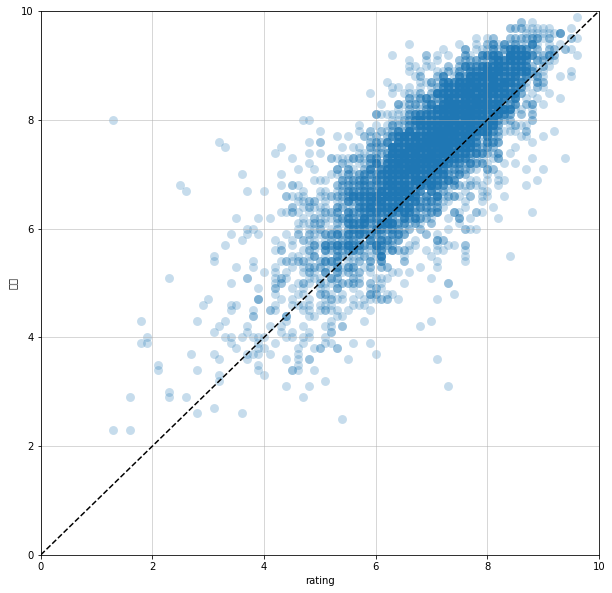

In [37]:
ax = df_all.plot(x='rating', 
        y='评分', 
        kind='scatter', 
        xlim=(0,10), 
        ylim=(0,10), 
        linewidth=0, 
        alpha=0.25,
        s=80,
        figsize=(10,10))
ax.grid(linewidth=0.5)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3", color='black')
#df[df.Continent == 'Africa'].plot(kind='scatter', x='GDP_per_capita', y='life_expectancy', s=100, c='red', ax=ax)

#plt.savefig('all_movies.pdf')

In [38]:
df_all

,genres,imdb_link,index,name,rating,ratingCount,时间,演员,电影名,评价人数,评分,链接
0,Action Adventure Thriller,http://www.imdb.com/title/tt0246460,0,Die Another Day (2002),6.1,"177,560",2002-11-22 00:00:00,"['皮尔斯·布鲁斯南', '哈莉·贝瑞', '托比·斯蒂芬斯', '裴淳华', '尹成植']",007之择日而亡,26876.0,7.1,https://movie.douban.com/subject/1303773/
1,Action Adventure Thriller,http://www.imdb.com/title/tt0120347,1,Tomorrow Never Dies (1997),6.5,"156,249",1997-12-09(伦敦首映),"['1997-12-12(英国)', '1997-12-19(美国)', '皮尔斯·布鲁斯南...",007之明日帝国,24367.0,7.2,https://movie.douban.com/subject/1299247/
2,Action Adventure Thriller,http://www.imdb.com/title/tt0113189,2,GoldenEye (1995),7.2,"207,650",1995-11-17 00:00:00,"['皮尔斯·布鲁斯南', '肖恩·宾', '伊沙贝拉·斯科鲁普科', '法米克·詹森', '...",007之黄金眼,25002.0,7.5,https://movie.douban.com/subject/1292677/
3,Action Adventure Thriller,http://www.imdb.com/title/tt0143145,3,The World Is Not Enough (1999),6.4,"163,937",1999-11-19(美国),"['1999-11-26(英国)', '皮尔斯·布鲁斯南', '苏菲·玛索', '罗伯特·卡...",007之黑日危机,24736.0,7.3,https://movie.douban.com/subject/1293174/
4,Action Adventure Thriller,http://www.imdb.com/title/tt0381061,4,Casino Royale (2006),8.0,"498,804",2006-11-16(英国),"['2006-11-17(美国)', '2007-01-30(中国大陆)', '丹尼尔·克雷...",007：大战皇家赌场,86365.0,7.4,https://movie.douban.com/subject/1418190/
5,Action Adventure Thriller,http://www.imdb.com/title/tt1074638,5,Skyfall (2012),7.8,"551,056",2012-10-26(英国),"['2012-11-09(美国)', '2013-01-21(中国大陆)', '丹尼尔·克雷...",007：大破天幕杀机,163698.0,6.9,https://movie.douban.com/subject/2363876/
6,Action Adventure Thriller,http://www.imdb.com/title/tt0830515,6,Quantum of Solace (2008),6.6,"350,323",2008-10-31(英国),"['2008-11-05(中国大陆)', '2008-11-14(美国)', '丹尼尔·克雷...",007：大破量子危机,63348.0,6.4,https://movie.douban.com/subject/1946882/
7,Action Adventure Thriller,http://www.imdb.com/title/tt2379713,7,Spectre (2015),6.8,"312,790",2015-10-26(英国),"['2015-11-06(美国)', '2015-11-13(中国大陆)', '丹尼尔·克雷...",007：幽灵党,107794.0,6.2,https://movie.douban.com/subject/11620560/
8,Animation Adventure Comedy,http://www.imdb.com/title/tt0055254,8,101 Dalmatians (1961),7.2,"121,497",1961-1-25(美国),"['罗德·泰勒', 'J·帕特·奥马利', 'Betty Lou Gerson', 'Mar...",101斑点狗,22590.0,7.9,https://movie.douban.com/subject/1298204/
9,Romance,http://www.imdb.com/title/tt1674766,9,101 ci qiu hun (2013),5.1,312,2013-02-12(中国大陆),"['2013-03-22(台湾)', '黄渤', '林志玲', '高以翔', '秦海璐']",101次求婚,119650.0,5.7,https://movie.douban.com/subject/5319835/


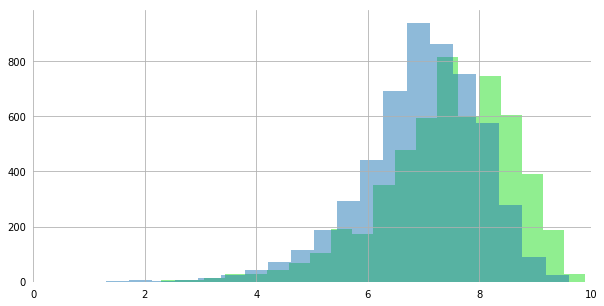

In [66]:
ax = df_all['评分'].hist(figsize=(10,5), color='lightgreen', bins=20)
df_all['rating'].hist(ax=ax, alpha=0.5, bins=20)
#ax.grid('off')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.set_xlim([0, 10])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig('distribution_ratings.pdf')

In [79]:
df_all[df_all['rating'] == 9.5999999999999996]

,genres,imdb_link,index,name,rating,ratingCount,时间,演员,电影名,评价人数,评分,链接
1127,Documentary,http://www.imdb.com/title/tt5491994,1169,Planet Earth II,9.6,"32,623",2016-11-06(英国),"['戴维·阿滕伯勒', '英国', 'www.bbc.co.uk/programmes/p0...",地球脉动第二季,12365.0,9.9,https://movie.douban.com/subject/26733371/
3259,Crime Drama Mystery,http://www.imdb.com/title/tt1942612,3391,A Scandal in Belgravia,9.6,"28,192",2012-01-01(英国),"['本尼迪克特·康伯巴奇', '马丁·弗瑞曼', '鲁珀特·格雷夫斯', '安德鲁·斯科特'...",神探夏洛克第二季,173320.0,9.5,https://movie.douban.com/subject/6522269/
3436,Drama,http://www.imdb.com/title/tt2811510,3574,Chapter 14,9.6,"6,875",2014-02-14(美国),"['凯文·史派西', '罗宾·怀特', '凯特·玛拉', '迈克尔·吉尔', '杰拉尔德·麦...",纸牌屋第二季,61177.0,9.2,https://movie.douban.com/subject/22523356/


In [48]:
df_all_with_genres = df_all[df_all['genres'].notnull()]

In [49]:
df_all_with_genres.shape

(5386, 12)

In [121]:
df_all_with_genres['genres'].value_counts().head(20)

Drama                         458
Drama Romance                 277
Comedy                        253
Comedy Romance                224
Comedy Drama Romance          173
Comedy Drama                  122
Action Crime Drama            103
Animation Adventure Comedy    100
Crime Drama Mystery            92
Animation Action Adventure     87
Documentary                    81
Romance                        77
Crime Drama Thriller           73
Action Adventure Sci-Fi        69
Crime Drama                    65
Action Crime Thriller          62
Action Comedy Crime            57
Action Adventure Fantasy       57
Action Adventure Drama         55
Action Adventure Comedy        54
Name: genres, dtype: int64

In [103]:
Action = df_all_with_genres[df_all_with_genres['genres'].str.contains('Action')]

In [104]:
Action.shape

(1270, 12)

In [81]:
Adventure = df_all_with_genres[df_all_with_genres['genres'].str.contains('Adventure')]

In [105]:
Adventure.shape

(813, 12)

In [87]:
Thriller = df_all_with_genres[df_all_with_genres['genres'].str.contains('Thriller')]

In [106]:
Thriller.shape

(536, 12)

In [88]:
Romance = df_all_with_genres[df_all_with_genres['genres'].str.contains('Romance')]

In [107]:
Romance.shape

(1114, 12)

In [89]:
Drama = df_all_with_genres[df_all_with_genres['genres'].str.contains('Drama')]

In [109]:
Drama.shape

(2733, 12)

In [90]:
Crime = df_all_with_genres[df_all_with_genres['genres'].str.contains('Crime')]

In [110]:
Crime.shape

(747, 12)

In [91]:
Comedy = df_all_with_genres[df_all_with_genres['genres'].str.contains('Comedy')]

In [111]:
Comedy.shape

(1739, 12)

In [93]:
Animation = df_all_with_genres[df_all_with_genres['genres'].str.contains('Animation')]

In [112]:
Animation.shape

(670, 12)

In [94]:
Adventure = df_all_with_genres[df_all_with_genres['genres'].str.contains('Adventure')]

In [113]:
Adventure.shape

(813, 12)

In [95]:
Mystery = df_all_with_genres[df_all_with_genres['genres'].str.contains('Mystery')]

In [114]:
Mystery.shape

(430, 12)

In [96]:
Documentary = df_all_with_genres[df_all_with_genres['genres'].str.contains('Documentary')]

In [115]:
Documentary.shape

(153, 12)

In [97]:
Biography = df_all_with_genres[df_all_with_genres['genres'].str.contains('Biography')]

In [116]:
Biography.shape

(230, 12)

In [98]:
War = df_all_with_genres[df_all_with_genres['genres'].str.contains('War')]

In [117]:
War.shape

(109, 12)

In [99]:
History = df_all_with_genres[df_all_with_genres['genres'].str.contains('History')]

In [119]:
History.shape

(201, 12)

In [122]:
Sci_Fi = df_all_with_genres[df_all_with_genres['genres'].str.contains('Sci-Fi')]

In [124]:
Sci_Fi.shape

(334, 12)

In [101]:
Music = df_all_with_genres[df_all_with_genres['genres'].str.contains('Music')]

In [125]:
Music.shape

(138, 12)

In [127]:
df_all_with_genres[df_all_with_genres['评分'] > 8.0]['genres'].value_counts()

Drama                         187
Drama Romance                  88
Comedy                         71
Crime Drama Mystery            61
Comedy Romance                 53
Documentary                    51
Comedy Drama Romance           48
Animation Action Adventure     48
Animation Comedy Drama         43
Comedy Drama                   37
Animation Adventure Comedy     33
Crime Drama                    30
Action Crime Drama             29
Crime Drama Thriller           26
Biography Drama                20
Adventure Drama Fantasy        19
Animation Short Comedy         18
Animation Comedy Family        18
Animation Action Comedy        17
Comedy Crime Drama             14
Drama War                      14
Animation                      14
Adventure Comedy Drama         14
Biography Drama History        14
Drama Mystery Sci-Fi           11
Animation Short                11
Animation Action Drama         10
Drama History                  10
Drama Mystery Romance          10
Drama Fantasy 